TITANIC SURVIVAL PREDICTION

In [61]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [63]:
td =pd.read_csv('/content/Titanic-Dataset.csv')
td.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [64]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
td.shape

(891, 12)

In [65]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
td = td.drop(columns = 'Cabin', axis = 1)

In [85]:
#Replacing the missing values in age column by mean and Embarked column by mode
Age = df['Age'].mean()
td['Age'].fillna(Age, inplace = True)
td['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [86]:
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [87]:
td.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [88]:
td['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [89]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

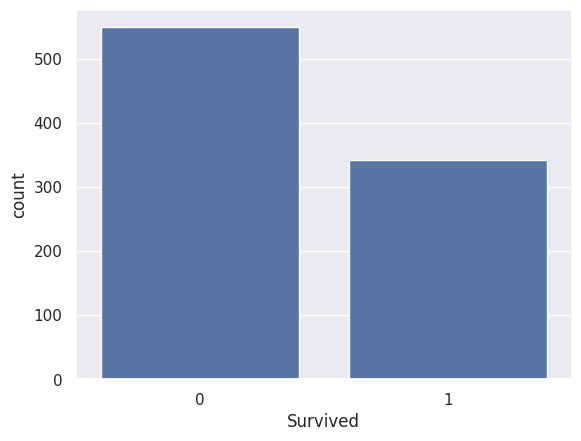

In [90]:
sns.countplot(x = 'Survived', data=td)

In [91]:
td['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

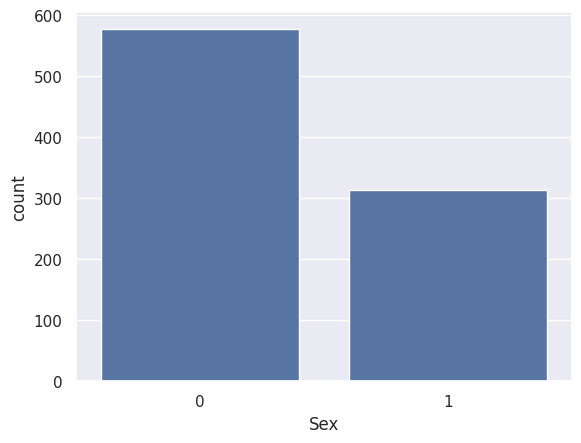

In [92]:
sns.countplot(x = 'Sex', data=td)

In [93]:
td['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [94]:
td['Survived_str'] = td.Survived.apply(str)

<Axes: xlabel='Sex', ylabel='count'>

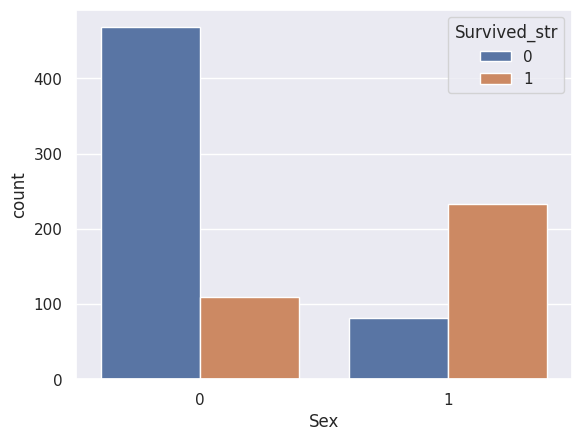

In [95]:
sns.countplot(x = 'Sex', hue = 'Survived_str', data=td)

<Axes: xlabel='Pclass', ylabel='count'>

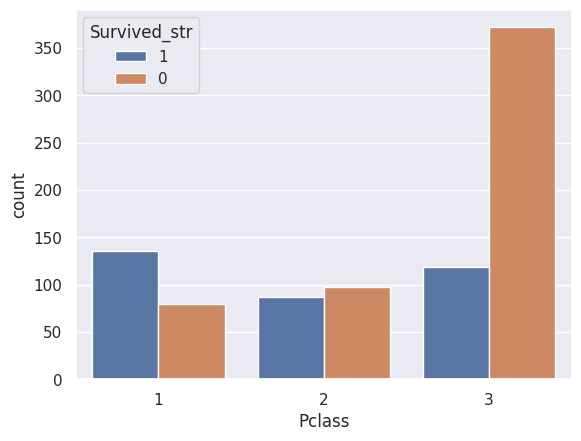

In [96]:
sns.countplot(x = 'Pclass',hue = 'Survived_str', data=td)

Encoding the Categorical Column

In [97]:
td['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [98]:
td['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [99]:
# Converting Categorical values
# 0 represents Male and 1 represents Female
# 0 represent S, 1 C class and 2 Q class
td.replace({'Sex':{'male' : 0 , 'female' : 1} ,  'Embarked':{'S' : 0, 'C' : 1 , 'Q' : 2}}, inplace = True)


td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived_str
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0


In [100]:
X = td.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived','Survived_str'], axis = 1)
Y = td['Survived']


print(X)

print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [101]:
td.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Survived_str    0
dtype: int64

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


In [103]:
model = LogisticRegression()

In [109]:
from sklearn.impute import SimpleImputer
# Assuming X_train is your feature matrix
imputer_embarked = SimpleImputer(strategy='most_frequent')
X_train['Embarked'] = imputer_embarked.fit_transform(X_train[['Embarked']])
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [110]:
model.fit(X_train,Y_train)

LogisticRegression()

In [111]:
LogisticRegression()

LogisticRegression()

Model Prediction

In [112]:
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0
 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0
 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0
 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0
 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0
 1 1 0 0 0 1 1 0 1 1 1 1 

In [113]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy Score of Traning Data: ',training_data_accuracy)

Accuracy Score of Traning Data:  0.797752808988764


In [114]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [115]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0]


In [116]:
training_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy Score of Test Data: ',training_data_accuracy)

Accuracy Score of Test Data:  0.8044692737430168


In [117]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_train, X_train_prediction)
recall = recall_score(Y_train, X_train_prediction)
f1 = f1_score(Y_train, X_train_prediction)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)

Precision:  0.7655677655677655
Recall:  0.7231833910034602
F1 Score:  0.7437722419928825


In [118]:
score = model.score(X_test,Y_test)
print(score)

0.8044692737430168


In [119]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_train, X_train_prediction)
print(cm)

[[359  64]
 [ 80 209]]


Text(0.5, 1.0, "('Accuracy Score :', 0.8044692737430168)")

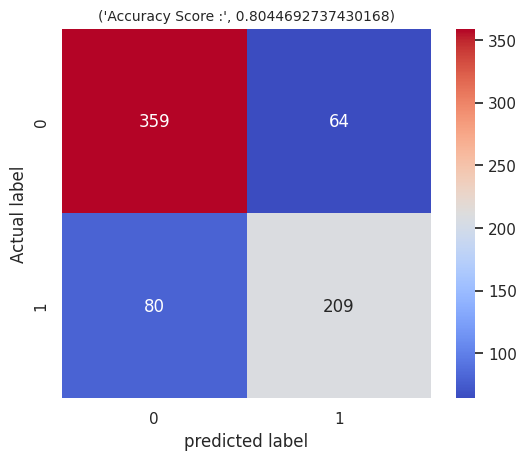

In [120]:
sns.heatmap(cm, annot = True, fmt = "d", square = True, cmap= "coolwarm")
plt.ylabel('Actual label')
plt.xlabel('predicted label')
title = ('Accuracy Score :',score)
plt.title(title, size = 10)